In [1]:
from dlcliche.notebook import *
from dlcliche.image import *

from imagehash import phash

DATA = Path('/data/mvtec_ad/original/cable/test')
files = [f.parent.name+'/'+f.name for f in sorted(DATA.glob('*/*.png'))]
df = pd.DataFrame({'file': files, 'mode': [Path(f).parent.name for f in files]})
typical_files = {key: group_df.file.values[0] for key, group_df in df.groupby('mode')}
modes = df['mode'].unique()

## PHash example

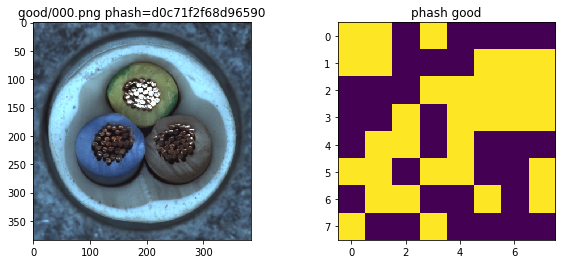

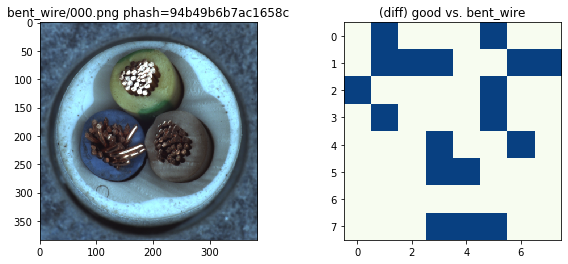

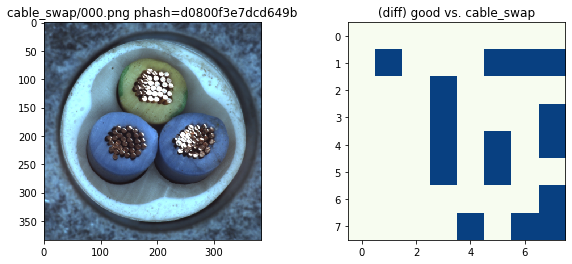

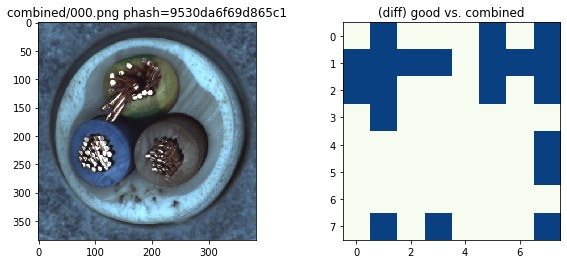

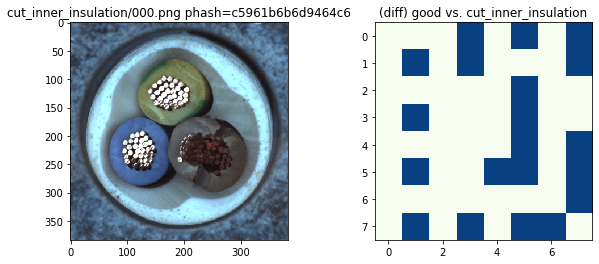

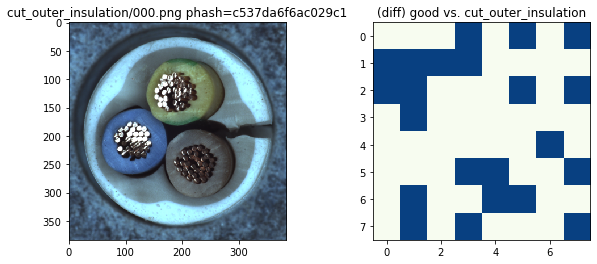

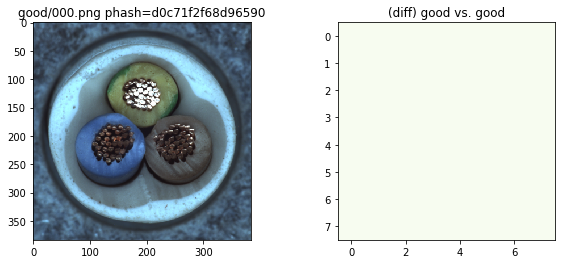

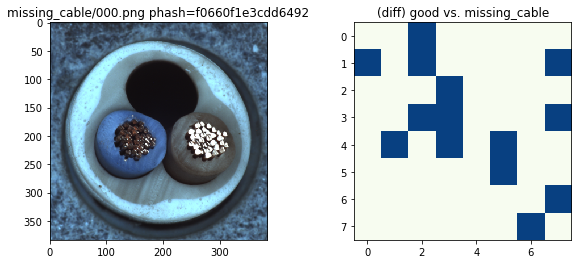

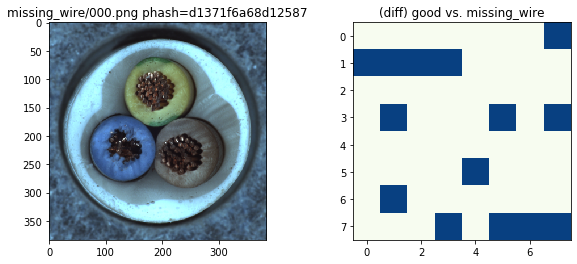

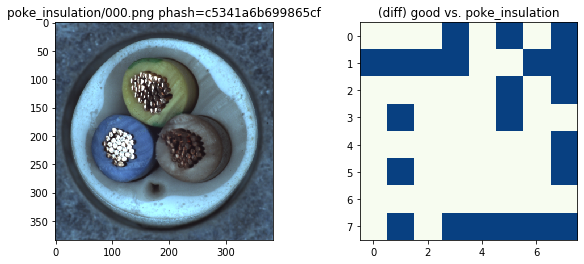

In [2]:
hash_size = 8

typical = pd.DataFrame({'mode': list(typical_files.keys()), 'file': list(typical_files.values())}).set_index('mode')

for mode in ['good']:
    file = typical_files[mode]
    img = Image.open(DATA/file).resize((384, 384))
    typical.loc[mode, 'phash'] = phash(img, hash_size)
    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc['good', 'phash'].hash)
    axs[1].set_title(f'phash {mode}')
    plt.show()

for mode in modes:
    file = typical_files[mode]
    img = Image.open(DATA/file).resize((384, 384))
    typical.loc[mode, 'phash'] = phash(img, hash_size)

    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc[mode, 'phash'].hash  ^ typical.loc['good', 'phash'].hash, cmap="GnBu")
    axs[1].set_title(f'(diff) good vs. {mode}')
    plt.show()

In [3]:
for mode in modes:
    typical.loc[mode, 'distance'] = np.abs(typical.loc['good' , 'phash'] - typical.loc[mode, 'phash'])

typical

file             phash  distance
mode                                                                          
bent_wire                        bent_wire/000.png  94b49b6b7ac1658c      18.0
cable_swap                      cable_swap/000.png  d0800f3e7dcd649b      16.0
combined                          combined/000.png  9530da6f69d865c1      20.0
cut_inner_insulation  cut_inner_insulation/000.png  c5961b6b6d9464c6      20.0
cut_outer_insulation  cut_outer_insulation/000.png  c537da6f6ac029c1      22.0
good                                  good/000.png  d0c71f2f68d96590       0.0
missing_cable                missing_cable/000.png  f0660f1e3cdd6492      14.0
missing_wire                  missing_wire/000.png  d1371f6a68d12587      14.0
poke_insulation            poke_insulation/000.png  c5341a6b699865cf      22.0

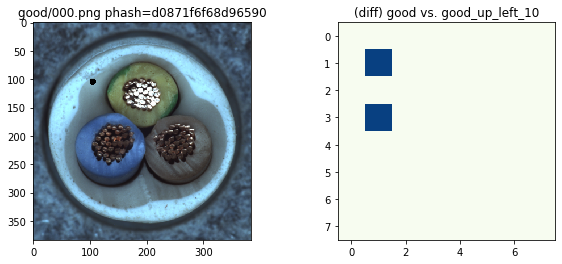

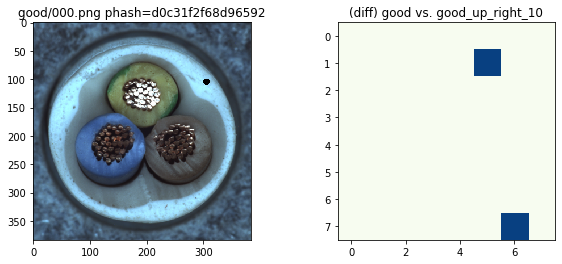

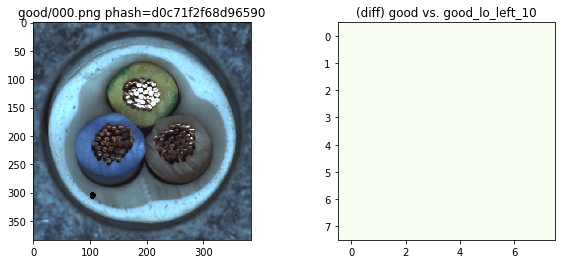

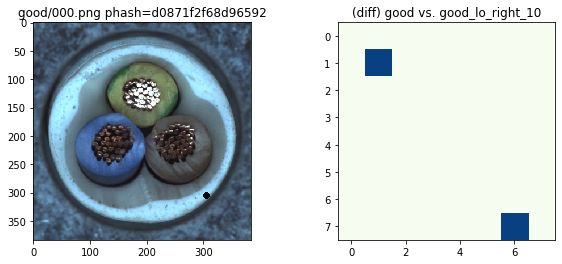

In [4]:
from PIL import ImageDraw
file = typical_files['good']
for name, shape in [
    ['up_left_10', (100, 100, 110, 110)],
    ['up_right_10', (300, 100, 310, 110)],
    ['lo_left_10', (100, 300, 110, 310)],
    ['lo_right_10', (300, 300, 310, 310)],
]:
    img = Image.open(DATA/file).resize((384, 384))
    draw = ImageDraw.Draw(img)
    draw.ellipse(shape, fill=(0, 0, 0), outline=(0, 0, 0))
    mode = 'good_'+name
    typical.loc[mode, 'phash']  = phash(img, hash_size)
    typical.loc[mode, 'distance'] = np.abs(typical.loc['good' , 'phash'] - typical.loc[mode, 'phash'])
    
    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc[mode, 'phash'].hash  ^ typical.loc['good', 'phash'].hash, cmap="GnBu")
    axs[1].set_title(f'(diff) good vs. {mode}')
    plt.show()

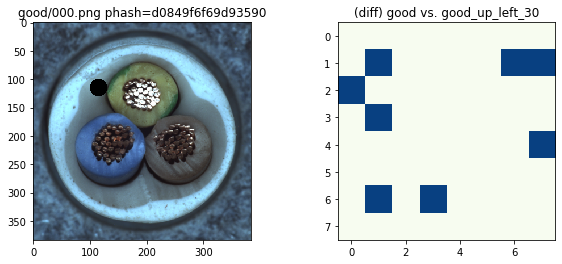

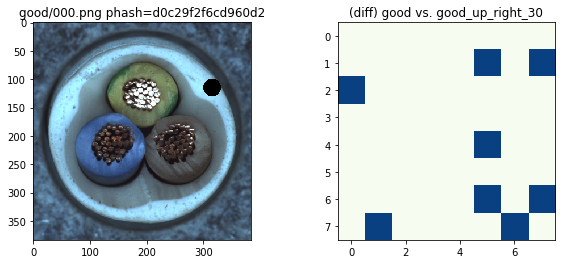

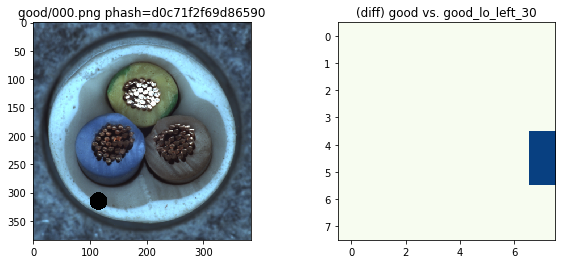

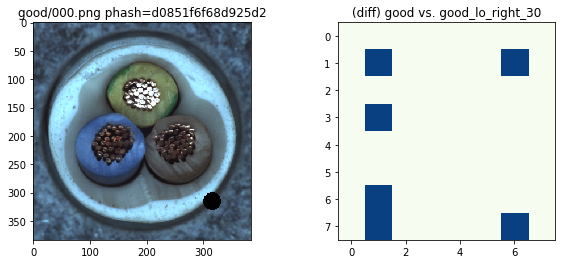

In [5]:
from PIL import ImageDraw

for name, shape in [
    ['up_left_30', (100, 100, 130, 130)],
    ['up_right_30', (300, 100, 330, 130)],
    ['lo_left_30', (100, 300, 130, 330)],
    ['lo_right_30', (300, 300, 330, 330)],
]:
    img = Image.open(DATA/file).resize((384, 384))
    draw = ImageDraw.Draw(img)
    draw.ellipse(shape, fill=(0, 0, 0), outline=(0, 0, 0))
    mode = 'good_'+name
    typical.loc[mode, 'phash']  = phash(img, hash_size)
    typical.loc[mode, 'distance'] = np.abs(typical.loc['good' , 'phash'] - typical.loc[mode, 'phash'])
    
    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc[mode, 'phash'].hash  ^ typical.loc['good', 'phash'].hash, cmap="GnBu")
    axs[1].set_title(f'(diff) good vs. {mode}')
    plt.show()

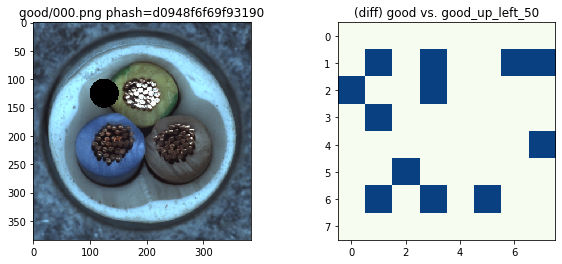

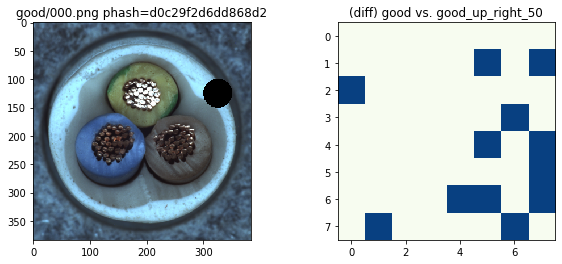

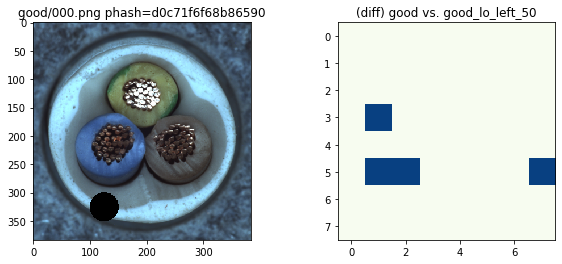

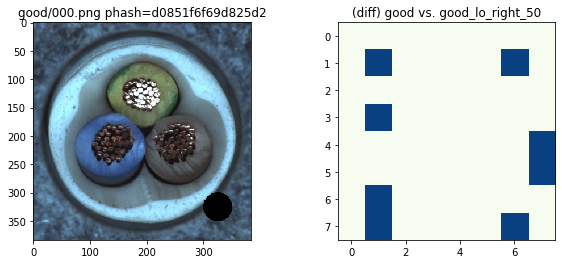

In [6]:
from PIL import ImageDraw

for name, shape in [
    ['up_left_50', (100, 100, 150, 150)],
    ['up_right_50', (300, 100, 350, 150)],
    ['lo_left_50', (100, 300, 150, 350)],
    ['lo_right_50', (300, 300, 350, 350)],
]:
    img = Image.open(DATA/file).resize((384, 384))
    draw = ImageDraw.Draw(img)
    draw.ellipse(shape, fill=(0, 0, 0), outline=(0, 0, 0))
    mode = 'good_'+name
    typical.loc[mode, 'phash']  = phash(img, hash_size)
    typical.loc[mode, 'distance'] = np.abs(typical.loc['good' , 'phash'] - typical.loc[mode, 'phash'])
    
    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc[mode, 'phash'].hash  ^ typical.loc['good', 'phash'].hash, cmap="GnBu")
    axs[1].set_title(f'(diff) good vs. {mode}')
    plt.show()

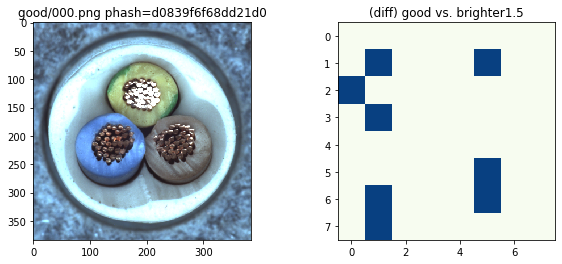

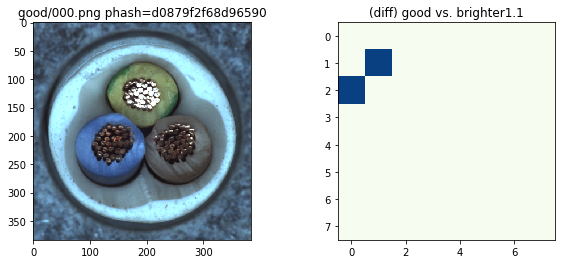

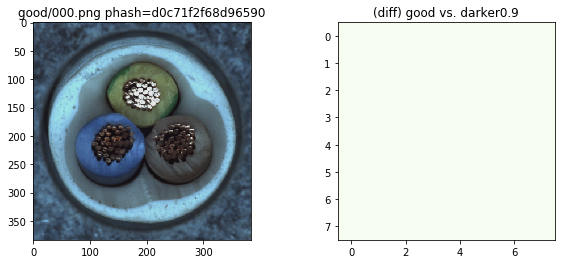

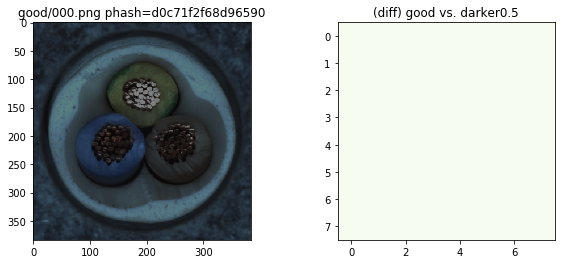

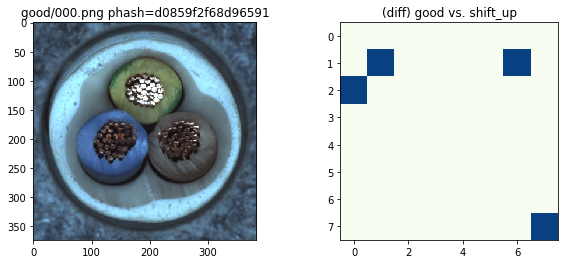

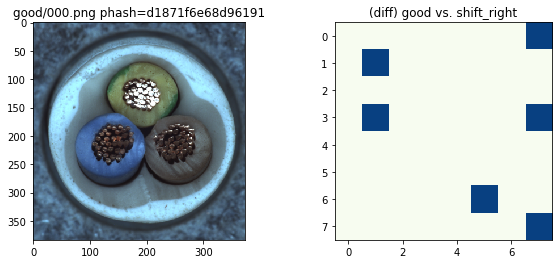

In [7]:
from PIL import ImageEnhance

for name, (dx, dy, gain) in [
    ['brighter1.5', (0, 0, 1.5)],
    ['brighter1.1', (0, 0, 1.1)],
    ['darker0.9', (0, 0, 0.9)],
    ['darker0.5', (0, 0, 0.5)],
    ['shift_up', (0, 10, 1.0)],
    ['shift_right', (-10, 0, 1.0)],
]:
    img = Image.open(DATA/file).resize((384, 384))
    img = img.transform(img.size, Image.AFFINE, (1, 0, dx, 0, 1, dy)).crop((-dx, 0, img.size[0], img.size[1] - dy))
    bright = ImageEnhance.Brightness(img)
    img = bright.enhance(gain)
    mode = name
    typical.loc[mode, 'phash']  = phash(img, hash_size)
    typical.loc[mode, 'distance'] = np.abs(typical.loc['good' , 'phash'] - typical.loc[mode, 'phash'])
    
    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc[mode, 'phash'].hash  ^ typical.loc['good', 'phash'].hash, cmap="GnBu")
    axs[1].set_title(f'(diff) good vs. {mode}')
    plt.show()

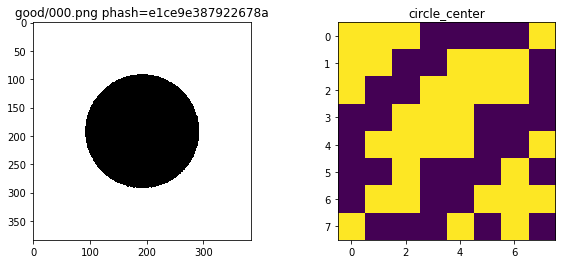

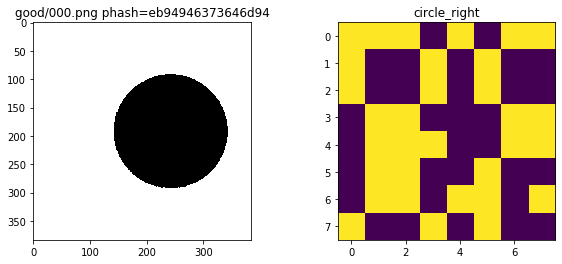

In [8]:
for name, shape in [
    ['circle_center', (384//2 - 100, 384//2 - 100, 384//2+100, 384//2+100)],
    ['circle_right', (384//2 - 50, 384//2 - 100, 384//2+150, 384//2+100)],
]:
    img = Image.new('RGB', (384, 384), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    draw.ellipse(shape, fill=(0, 0, 0), outline=(0, 0, 0))
    mode = name
    typical.loc[mode, 'phash']  = phash(img, hash_size)
    typical.loc[mode, 'distance'] = np.abs(typical.loc['good' , 'phash'] - typical.loc[mode, 'phash'])
    
    axs = subplot_matrix(1, 2, figsize=(10, 4))
    axs[0].imshow(img)
    axs[0].set_title(f'{file} phash={typical.loc[mode, "phash"]}')
    axs[1].imshow(typical.loc[mode, 'phash'].hash)
    axs[1].set_title(f'{mode}')
    plt.show()

In [9]:
typical

file             phash  distance
mode                                                                          
bent_wire                        bent_wire/000.png  94b49b6b7ac1658c      18.0
cable_swap                      cable_swap/000.png  d0800f3e7dcd649b      16.0
combined                          combined/000.png  9530da6f69d865c1      20.0
cut_inner_insulation  cut_inner_insulation/000.png  c5961b6b6d9464c6      20.0
cut_outer_insulation  cut_outer_insulation/000.png  c537da6f6ac029c1      22.0
good                                  good/000.png  d0c71f2f68d96590       0.0
missing_cable                missing_cable/000.png  f0660f1e3cdd6492      14.0
missing_wire                  missing_wire/000.png  d1371f6a68d12587      14.0
poke_insulation            poke_insulation/000.png  c5341a6b699865cf      22.0
good_up_left_10                                NaN  d0871f6f68d96590       2.0
good_up_right_10                               NaN  d0c31f2f68d96592       2.0
good_lo_left_10                                NaN  d0c71f2f68d96590       0.0
good_lo_right_10                               NaN  d0871f2f68d96592       2.0
good_up_left_30                                NaN  d0849f6f69d93590       8.0
good_up_right_30                               NaN  d0c29f2f6cd960d2       8.0
good_lo_left_30                                NaN  d0c71f2f69d86590       2.0
good_lo_right_30                               NaN  d0851f6f68d925d2       6.0
good_up_left_50                                NaN  d0948f6f69f93190      12.0
good_up_right_50                               NaN  d0c29f2d6dd868d2      12.0
good_lo_left_50                                NaN  d0c71f6f68b86590       4.0
good_lo_right_50                               NaN  d0851f6f69d825d2       8.0
brighter1.5                                    NaN  d0839f6f68dd21d0       8.0
brighter1.1                                    NaN  d0879f2f68d96590       2.0
darker0.9                                      NaN  d0c71f2f68d96590       0.0
darker0.5                                      NaN  d0c71f2f68d96590       0.0
shift_up                                       NaN  d0859f2f68d96591       4.0
shift_right                                    NaN  d1871f6e68d96191       6.0
circle_center                                  NaN  e1ce9e387922678a      24.0
circle_right                                   NaN  eb94946373646d94      28.0

## Commentary

Look closer to the implementation https://github.com/bjlittle/imagehash/blob/master/imagehash.

Algorithm demystified.

In [10]:
# https://github.com/bjlittle/imagehash/blob/master/imagehash/__init__.py#L116
if True: # def phash(image, hash_size=8, highfreq_factor=4):
    image = Image.open(DATA/file).resize((384, 384))
    hash_size=8
    highfreq_factor=4
    """
    Perceptual Hash computation.
    Implementation follows http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html
    @image must be a PIL instance.
    """
    import scipy.fftpack
    
    # Image size will be 8 * 4 = 32
    img_size = hash_size * highfreq_factor
    print('img_size', img_size)

    # Image -> gray scale color -> resized to (32, 32) with anti-alias
    image = image.convert("L").resize((img_size, img_size), Image.ANTIALIAS)

    # (32, 32) pixels -> DCT axis=0 -> DCT axis=1 => only lower freq is used (8, 8)
    pixels = np.array(image.getdata(), dtype=np.float).reshape((img_size, img_size))
    dct = scipy.fftpack.dct(scipy.fftpack.dct(pixels, axis=0), axis=1)
    dctlowfreq = dct[:hash_size, :hash_size]
    print('pixels', pixels.shape)
    print('dctlowfreq', dctlowfreq.shape)

    # (8, 8) coefficients -> compared with median 
    med = np.median(dctlowfreq)
    diff = dctlowfreq > med
    print('med', med)
    print('diff', diff)
    print('diff (uint8)', np.array(diff, dtype=np.uint8))

    # return ImageHash(diff)

img_size 32
pixels (32, 32)
dctlowfreq (8, 8)
med 6.855277875208088
diff [[ True  True False  True False False False False]
 [ True  True False False False  True  True  True]
 [False False False  True  True  True  True  True]
 [False False  True False  True  True  True  True]
 [False  True  True False  True False False False]
 [ True  True False  True  True False False  True]
 [False  True  True False False  True False  True]
 [ True False False  True False False False False]]
diff (uint8) [[1 1 0 1 0 0 0 0]
 [1 1 0 0 0 1 1 1]
 [0 0 0 1 1 1 1 1]
 [0 0 1 0 1 1 1 1]
 [0 1 1 0 1 0 0 0]
 [1 1 0 1 1 0 0 1]
 [0 1 1 0 0 1 0 1]
 [1 0 0 1 0 0 0 0]]
